In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import zipfile
zip_path = '/content/drive/MyDrive/Text Recognization/'
unzip_path='/content/drive/MyDrive/Text Recognization/work'

with zipfile.ZipFile(zip_path + 'train.zip', 'r') as zip_ref:
    zip_ref.extractall(unzip_path)

with zipfile.ZipFile(zip_path + 'test.zip', 'r') as zip_ref:
    zip_ref.extractall(unzip_path)  

with zipfile.ZipFile(zip_path + 'train_cleaned.zip', 'r') as zip_ref:
    zip_ref.extractall(unzip_path)

In [ ]:
def imageToArray(path):
  img = cv2.imread(path)
  img = np.asarray(img, dtype="float32")
  img = cv2.resize(img, (540, 420))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = img/255.0
  img = np.reshape(img, (420, 540, 1))
  return img

In [ ]:
import os
import cv2
train = []
train_cleaned = []
test = []

for f in sorted(os.listdir(unzip_path + '/train/')):
    train.append(imageToArray(unzip_path + '/train/' + f))

for f in sorted(os.listdir(unzip_path + '/train_cleaned/')):
    train_cleaned.append(imageToArray(unzip_path + '/train_cleaned/' + f))
   
for f in sorted(os.listdir(unzip_path + '/test/')):
    test.append(imageToArray(unzip_path + '/test/' + f))

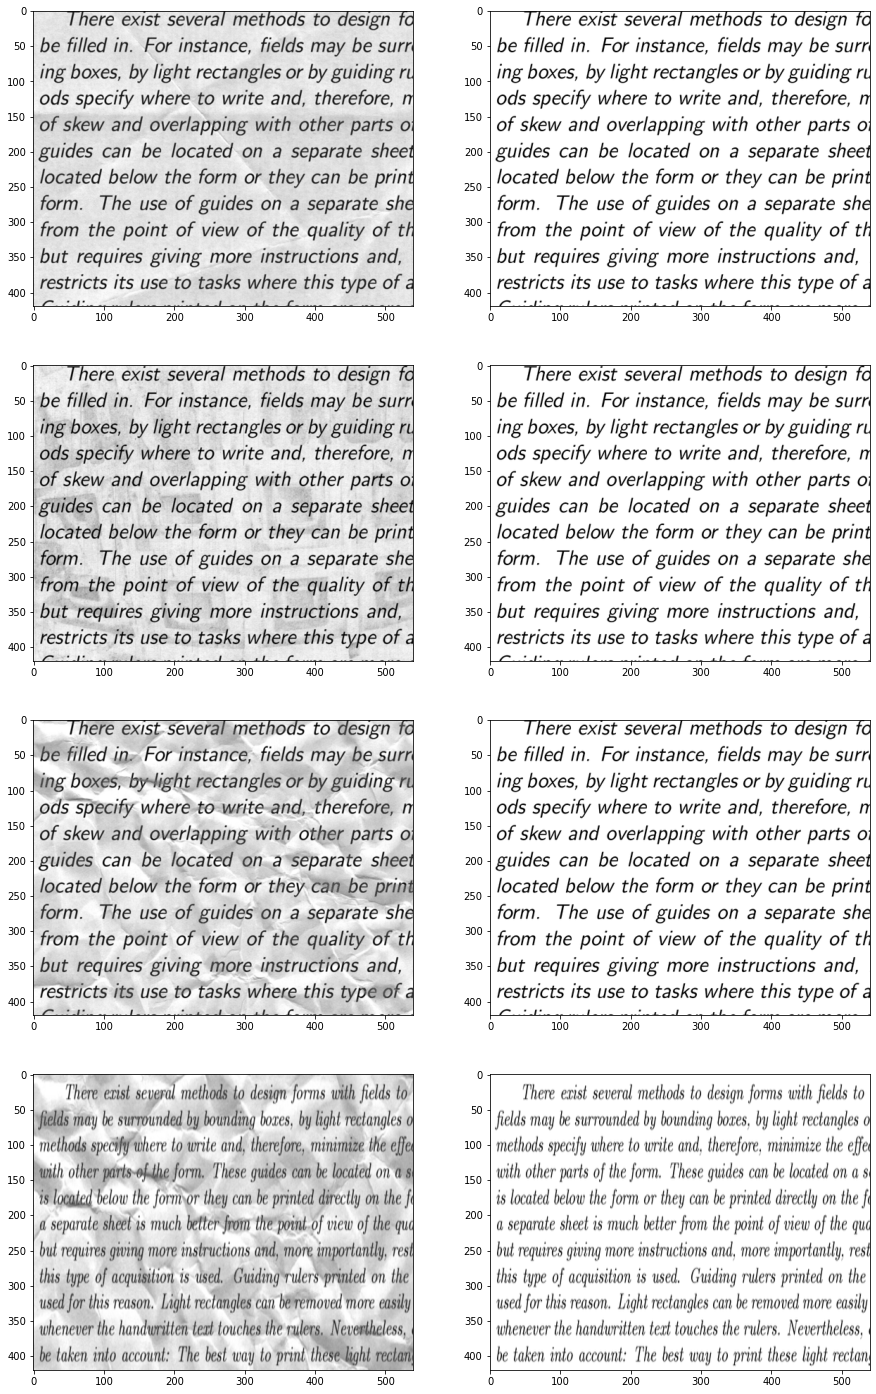

In [ ]:
plt.figure(figsize=(15,25))
for i in range(0,8,2):
    plt.subplot(4,2,i+1)
    plt.imshow(train[i][:,:,0], cmap='gray')
    
    plt.subplot(4,2,i+2)
    plt.imshow(train_cleaned[i][:,:,0], cmap='gray')

plt.show()

In [ ]:
X_train = np.asarray(train)
Y_train = np.asarray(train_cleaned)
X_test = np.asarray(test)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping

def model():
    input_layer = Input(shape=(420, 540, 1))
    
    # encoding
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.15)(x)

    # decoding
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)

    output_layer = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    model = Model(inputs=[input_layer], outputs=[output_layer])
    model.compile(optimizer='adam' , loss='mean_squared_error', metrics=['mae'])

    return model


model = model()
model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 420, 540, 1)]     0         
                                                                 
 conv2d_14 (Conv2D)          (None, 420, 540, 64)      640       
                                                                 
 batch_normalization_12 (Bat  (None, 420, 540, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 210, 270, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 210, 270, 128)     73856     
                                                                 
 batch_normalization_13 (Bat  (None, 210, 270, 128)    512 

In [ ]:
callback = EarlyStopping(monitor='loss', patience=20)
history = model.fit(X_train, Y_train, validation_split = 0.15, epochs=1000, batch_size=30, verbose=1, callbacks=[callback])

Epoch 1/1000
5/5 [==============================] - 69s 13s/step - loss: 0.2274 - mae: 0.3431 - val_loss: 0.1663 - val_mae: 0.3968
Epoch 2/1000
5/5 [==============================] - 66s 13s/step - loss: 0.1231 - mae: 0.2394 - val_loss: 0.1265 - val_mae: 0.3435
Epoch 3/1000
5/5 [==============================] - 67s 13s/step - loss: 0.0986 - mae: 0.2197 - val_loss: 0.1096 - val_mae: 0.3146
Epoch 4/1000
5/5 [==============================] - 67s 13s/step - loss: 0.0854 - mae: 0.1898 - val_loss: 0.6200 - val_mae: 0.7549
Epoch 5/1000
5/5 [==============================] - 66s 13s/step - loss: 0.0745 - mae: 0.1834 - val_loss: 0.8454 - val_mae: 0.8849
Epoch 6/1000
5/5 [==============================] - 66s 13s/step - loss: 0.0670 - mae: 0.1690 - val_loss: 0.8604 - val_mae: 0.8933
Epoch 7/1000
5/5 [==============================] - 66s 13s/step - loss: 0.0597 - mae: 0.1601 - val_loss: 0.8602 - val_mae: 0.8931
Epoch 8/1000
5/5 [==============================] - 66s 13s/step - loss: 0.0570 - m

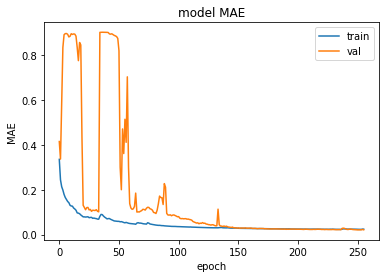

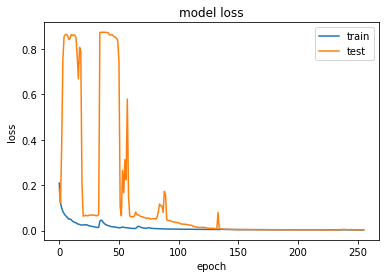

In [ ]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
X_test.shape

(72, 420, 540, 1)

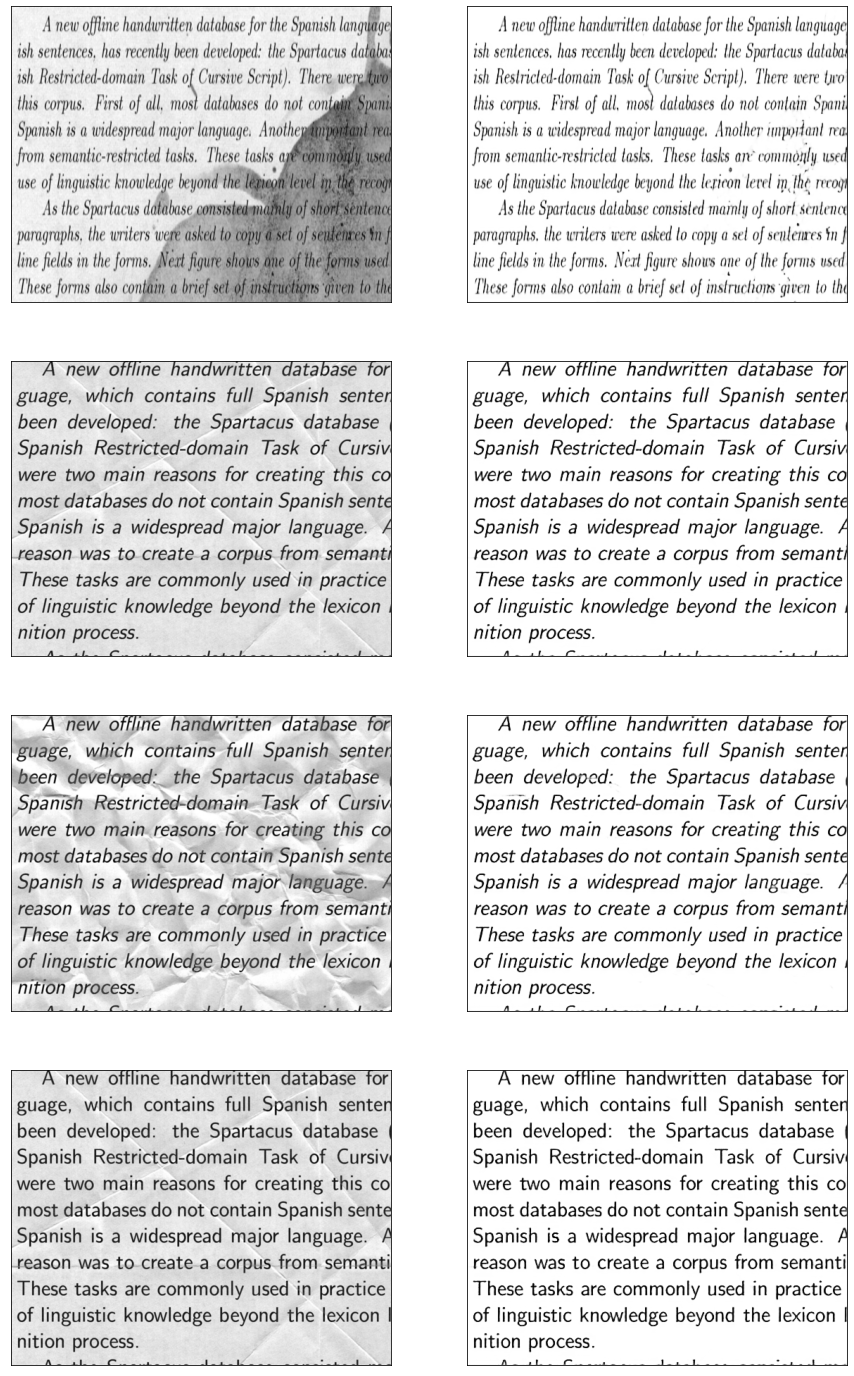

In [ ]:
plt.figure(figsize=(15,25))
for i in range(0,8,2):
    plt.subplot(4,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i][:,:,0], cmap='gray')
    
    plt.subplot(4,2,i+2)
    plt.xticks([])
    plt.yticks([])
    Y_test = (model.predict(X_test[i].reshape(1,420,540,1))).reshape(420,540)
    plt.imshow(Y_test, cmap='gray')

plt.show()